In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load first dataset
AdvWorksCusts = pd.read_csv('AdventureWorks/AdvWorksCusts.csv')
print(AdvWorksCusts.shape)

(16519, 23)


In [5]:
# load second dataset
AW_AveMonthSpend = pd.read_csv('AdventureWorks/AW_AveMonthSpend.csv')
print(AW_AveMonthSpend.shape)

(16519, 2)


In [7]:
# load third dataset
AW_BikeBuyer = pd.read_csv('AdventureWorks/AW_BikeBuyer.csv')
print(AW_BikeBuyer.shape)

(16519, 2)


In [8]:
# merge all datasets
df = AdvWorksCusts.merge(AW_AveMonthSpend, on='CustomerID')
print(df.shape)
df = df.merge(AW_BikeBuyer, on='CustomerID')
print(df)

(16749, 24)
       CustomerID Title  FirstName MiddleName LastName Suffix  \
0           11000   NaN        Jon          V     Yang    NaN   
1           11001   NaN     Eugene          L    Huang    NaN   
2           11002   NaN      Ruben        NaN   Torres    NaN   
3           11003   NaN    Christy        NaN      Zhu    NaN   
4           11004   NaN  Elizabeth        NaN  Johnson    NaN   
...           ...   ...        ...        ...      ...    ...   
17204       29478   NaN     Darren          D  Carlson    NaN   
17205       29479   NaN      Tommy          L     Tang    NaN   
17206       29480   NaN       Nina          W     Raji    NaN   
17207       29481   NaN       Ivan        NaN     Suri    NaN   
17208       29482   NaN    Clayton        NaN    Zhang    NaN   

                 AddressLine1 AddressLine2            City  StateProvinceName  \
0             3761 N. 14th St          NaN     Rockhampton         Queensland   
1                  2243 W St.          NaN   

In [7]:
# retrieve all columns
cols = df.columns
print(cols)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


In [8]:
# check for columns with missing values
print("\nColumns with missing values")
print(df.isna().any()[lambda x:x])


Columns with missing values
Title           True
MiddleName      True
Suffix          True
AddressLine2    True
dtype: bool


In [9]:
print("\nColumns with missing value and counts")
print("{0:12} \t{1} \t{2}".format('', 'Null', 'Not Null'))
for column in df :
    if df[column].isnull().any() :
        print("{0:12} \t{1} \t{2}"
              .format(column, df[column].isnull().sum(), 
                      df.shape[0] - df[column].isnull().sum()))


Columns with missing value and counts
             	Null 	Not Null
Title        	17121 	88
MiddleName   	7189 	10020
Suffix       	17207 	2
AddressLine2 	16918 	291


In [10]:
# remove duplicates and keep recent records
print("\tRemoving duplicates and keeping the recent records")
print("{0}\t{1}".format('Before: ', df.shape))
df.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
print("{0}\t\t{1}".format('After: ', df.shape))
print("{0}\t{1}".format('Unique: ', df.CustomerID.unique().shape))

	Removing duplicates and keeping the recent records
Before: 	(17209, 25)
After: 		(16404, 25)
Unique: 	(16404,)


In [11]:
# summary statistics
print("\tSummary Statistics")
print()
print(df[['AveMonthSpend']].describe())

	Summary Statistics

       AveMonthSpend
count   16404.000000
mean       72.391002
std        27.269921
min        22.000000
25%        52.000000
50%        68.000000
75%        84.000000
max       176.000000


In [12]:
# bike buyer
print("\tBike Buyer")
print()
bike_buyer = df['BikeBuyer'].value_counts()
print(bike_buyer)

	Bike Buyer

0    10949
1     5455
Name: BikeBuyer, dtype: int64


In [13]:
# ranks the median YearlyIncome by Occupation
print("\tMedian YearlyIncome by Occupation")
print()
print(df[['Occupation', 'YearlyIncome']]
      .groupby('Occupation').median()
      .sort_values(by='YearlyIncome'))

	Median YearlyIncome by Occupation

                YearlyIncome
Occupation                  
Manual               21722.0
Clerical             49481.0
Skilled Manual       66471.5
Professional         99058.0
Management          118781.0


In [20]:
# calculate Age
today = pd.to_datetime(datetime.today()).year
today = datetime.today().strftime("%Y-%m-%d")
print(today)
print(pd.to_datetime(today).year)
df['Age'] = df.loc[:,'BirthDate'].apply(lambda x : (pd.to_datetime(today).year-pd.to_datetime(datetime.strptime(x.strip(), "%Y-%m-%d")).year))
df[['FirstName', 'BirthDate', 'Age']].head(10)

2019-12-04
2019


,FirstName,BirthDate,Age
0,Jon,1966-04-08,53
1,Eugene,1965-05-14,54
2,Ruben,1965-08-12,54
3,Christy,1968-02-15,51
4,Elizabeth,1968-08-08,51
5,Julio,1965-08-05,54
6,Janet,1965-12-06,54
7,Marco,1964-05-09,55
8,Rob,1964-07-07,55
9,Shannon,1964-04-01,55


Gender


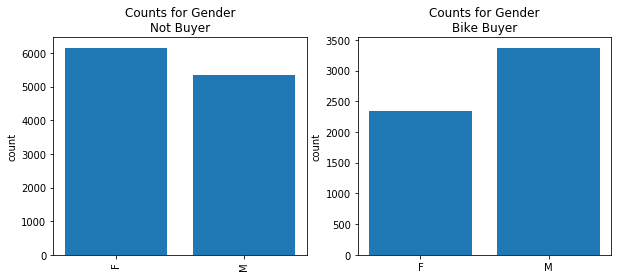

Occupation


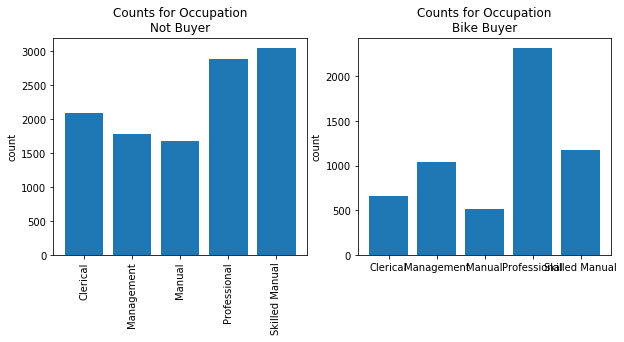

MaritalStatus


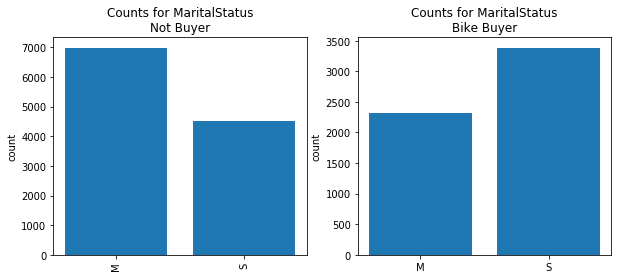

In [12]:
# get the columns for plotting
num_cols = ['Gender', 'Occupation', 'MaritalStatus']

# plot for bike buyer
df['dummy'] = np.ones(shape = df.shape[0])
for col in num_cols :
    print(col)
    counts = df[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title("Counts for " + col + "\nNot Buyer")
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=0)
    plt.title("Counts for " + col + "\nBike Buyer")
    plt.ylabel("count")
    plt.show()